# Fundamentals of Data Analysis Tasks

Phelim Barry

***

# Introduction

The purpose of this notebook is to outline the five tasks for Fundamentals of Data Analysis and describe the methods and analysis used in completing them.

# Table of Contents

1. [Task1 - Collatz Conjecture](#Task1)
2. [Task2 - Penguin Dataset Overview](#Task2)
3. [Task3 - Penguin Dataset Probability Distributions](#Task3)
4. [Task4 - Entropy of a Coin Toss](#Task4)
5. [Task5 - Penguin Dataset Plotting](#Task5)
6. [References](#References)



In [1]:
# Import any required modules
import seaborn as sns # for plotting
import numpy as np # for working with arrays
import matplotlib.pyplot as plt # for plotting

# Task1

>The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer $x$ and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .   
This task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

If $x$ is even, $f(x) = x ÷ 2$   
If $x$ is odd, $f(x) = 3x + 1$

Define a function for $f(x)$ and apply the appropriate formula. Using the modulus operator we can determine if $x$ is even (i.e. no remainder when divided by 2) or else $x$ must be odd.

In [2]:
def f(x):
    if x % 2 == 0:          #x is even
        return x // 2
    else:                   #x is odd
        return (3 * x) + 1

Define a function to check the $x$ value. If after applying the formula to the number, we arrive at a value equal to 1 then we have proved for that number and move on to the next number. If we reach the number 10001 then we have proved for all numbers between 1 and 10000

In [3]:
def collatz(x):
    while x != 1:
        x = f(x)            #call the f(x) function

Run the function and print a confirmation message once complete.

In [4]:
# Define start and end range values
start_range = 1
stop_range = 10001

for num in range (start_range, stop_range):
    collatz(num)        #call the collatz function

print (f'We have cycled through the values from {start_range} to {stop_range-1} and each time ended with a value of 1 \nindicating the conjecture is true for the first {stop_range-1} positive integers')


We have cycled through the values from 1 to 10000 and each time ended with a value of 1 
indicating the conjecture is true for the first 10000 positive integers


# Task2


>The purpose of this task is to give an overview of the penguins data set explaining the types of variables it contains.

>We will also suggest the types of variables that should be used to model them in Python giving explanations for the rationale.

**Overview**

The Palmer Penguin Dataset contains measurements of three different species of penguins from three islands in the Palmer Archipelago in Antartica. The data were collected between 2007 and 2009 and made available by researcher Dr. Kristen Gorman and other researchers from the Palmer Research Station.

Similar to the Iris dataset it is often used to explore areas of data analysis such as correlation and regression.
 

The dataset is available to view in a number of locations where we could quickly look and see the column names such as from Michael Waskom's $^1$ repository on GitHub. From there we can see that the dataset has seven columns of data containing the following variables:

| Variable Name |
| --- |
| species |
| island |
| bill_length_mm |
| bill_depth_mm |
| flipper_length_mm |
| body_mass_g |
| sex |
 

The dataset is also available directly through seaborn so by importing it we can do some analysis on the data to better understand the amount of data and the different columns.

In [5]:
# Load the penguins data set into a new dataframe df

#import seaborn as sns
#import numpy as np

df=sns.load_dataset ('penguins')


In [6]:
# print the dataframe to view the data

df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


From this we can see that species, island and sex contain categorical data while the remaining seem to contain numerical data.

We can then use the ```unique``` command to list the full set of values in each column containing categorical variables...

In [7]:
#x = df.species.unique()
print(f'The values in species column are {df.species.unique()}')
print(f'The values in island column are {df.island.unique()}')
print(f'The values in sex column are {df.sex.unique()}')


The values in species column are ['Adelie' 'Chinstrap' 'Gentoo']
The values in island column are ['Torgersen' 'Biscoe' 'Dream']
The values in sex column are ['Male' 'Female' nan]


Categorical variable types are used when the variable can only be one of a specific list of values or used to describe qualitative data. In the penguins dataset the three categorical variables have very specific values.   
Species has three values: Adelie, Chinstrap and Gentoo. Island also has three values: Biscoe, Dream and Torgersen. Sex has two values: male and female.   
All three of these variables can be described as nominal as they are being used to name something.   



Numeric variable types are also known as quantitative variables because they typically are used to measure something using a number value. The penguins dataset contains four numeric variables with three measured in millimeters and one measured in grams. These are continuous variables and can be further broken down and described as ratio variables because they cantain numbers that have measurable differences that can be determined such as the differences in lengths, weights etc. Given that all four of the variables are being used to measure something they would be considered to be using real numbers. The presence of decimal places also points to them being real numbers.

Based on the analysis above we can determine that the dataset contains the following variables and data types.

| Variable Name | Type | Description |
| --- | --- | --- |
| species | categorical | penguin species - Adelie, Chinstrap or Gentoo |
| island | categorical | island name - Biscoe, Dream or Torgersen |
| bill_length_mm | numeric/real | penguin bill length measured in mm |
| bill_depth_mm | numeric/real | penguin bill depth measured in mm |
| flipper_length_mm | numeric/real | penguin flipper length measured in mm |
| body_mass_g | numeric/real | penguin body mass measured in grams |
| sex | categorical | penguin sex - male or female |

**Suggested Variable Types in Python**

To model each of the variables in Python the following data types are suggested...


| Variable Name | Type | Python Variable Type |
| --- | --- | --- |
| species | categorical | string |
| island | categorical | string |
| sex | categorical | string |
| bill_length | numeric/real | float |
| bill_depth | numeric/real | float |
| flipper_length | numeric/real | float |
| body_mass | numeric/real | float |

Categorical variables typically only contain a limited number of possible values and would not be used to perform any mathematical operations. They can contain alpha characters, numerica values or even special characters but usually would not contain numbers only. Such variables are stored as type ```string``` or ```str``` in Python.   

Species, Island and sex can all be modeled as type ```str```. All three variables contain alpha characters and are a small set of fixed values. 

Numeric values in python usually are defined as type ```int``` or ```floating point``` (can also be complex). ```int``` variable types are whole numbers with no decimal places. They are ideal for performing addition or subtraction but if we are to perform any arithmetic involving division such as calculating means or average values, then our calculated value would turn into a ```float``` by default python logic. ```float``` or floating-point variables are used to store values with decimal points. Arithmetic on float values will always result in another float value and will display a value after the decimal point even if the value is $.0$.   

With this in mind it would be best to model bill_length and bill_depth as type ```float``` because both contain decimal values. 
flipper_length and body_mass could be stored as ```int``` variables as they do not contain decimals however if we needed to convert the values to centimeters or kilograms then that would introduce decimal places so it would be best to store them as ```float``` also.

In total, there are 344 rows of data in the dataset. However, unlike the iris dataset, the penguins dataset has some missing values which show up as 'NaN' when the data is imported. These can be found using the ```isnull().sum()``` command as follows:

In [8]:
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

When analysing the data these will need to be taken into consideration and dealt with appropriately. For example, 

# Task3

>For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

The dataset contains the following variables:
| Variable Name |
| --- |
| species |
| island |
| bill_length_mm |
| bill_depth_mm |
| flipper_length_mm |
| body_mass_g |
| sex |

### Species ###  
We can see that the species variable is categorical and can only contain one of three possible values - Gentoo, Adelie or Chinstrap. The data shows that the numbers are not equally distributed   

    Adelie - 152 (44%)   
    Gentoo - 68 (20%)   
    Chinstrap - 124 (36%)      

To model this data we would use a multinomial distribution and include weighting to closely replicate the original data accordingly. 


In [9]:
# model species variable using multinomial distribution
rng = np.random.default_rng()
species_prob = rng.multinomial(10000, [0.44, 0.20, 0.36])

print ('Count = 10000')
print (f'Random number of Adelie = {species_prob[0]}')
print (f'Random number of Gentoo = {species_prob[1]}')
print (f'Random number of Chinstrap = {species_prob[2]}')

Count = 10000
Random number of Adelie = 4330
Random number of Gentoo = 1984
Random number of Chinstrap = 3686


### Island ###  
Similar to the species variable, the island variable is also categorical and again can only contain one of three possible values - Biscoe, Dream or Torgersen. The data shows that the numbers are not equally distributed   

    Biscoe - 168 (49%)   
    Dream - 124 (36%)   
    Torgersen - 52 (15%)      

To model this data we would again use a multinomial distribution and include weighting to closely replicate the original data accordingly. 

In [10]:
# model island variable using multinomial distribution
rng = np.random.default_rng()
island_prob = rng.multinomial(10000, [0.49, 0.36, 0.15])

print ('Count = 10000')
print (f'Random number of Biscoe = {island_prob[0]}')
print (f'Random number of Dream = {island_prob[1]}')
print (f'Random number of Torgersen = {island_prob[2]}')


Count = 10000
Random number of Biscoe = 4860
Random number of Dream = 3649
Random number of Torgersen = 1491


### Sex ###  
We can see that the sex variable only contains two possible values - male or female - meaning the data is discrete, and each sample is independent of each other. We can also see that there seems an almost equal possibility of a penguin being either male or female.

    Female - 165 (49.55%)   
    Male - 168 (50.45%)       


With these details in mind we could model the data using a binomial distribution.

In [11]:
# model sex variable using binomial distributions
rng = np.random.default_rng()

n, p = 1, .5045  # n = number of trials (success=male, failure=female), p = probability of each trial (.5045 for male)
sex_prob = rng.binomial(n, p, 10000)

# Print results
male = np.sum(sex_prob == 1)
female = np.sum(sex_prob == 0)
print ('count = 10000')
print (f'Random number of males = {male}')
print (f'Random number of females = {female}')

count = 10000
Random number of males = 5088
Random number of females = 4912


### Body Mass

Body Mass is a continuous variable and quite often the weights of a population are normally distributed meaning we could potentially model it using the 'normal distribution'. However if we look at the data we can see the difference between the mean and 50th percentile is significant and the deviations between min/max and the mean indicate some amount of skewness in the data.

In [12]:
df.body_mass_g.describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

We know there are different species of penguin in the data set so next step would be to look at each species individually, starting with the Chinstrap species.

In [13]:
chinstrap_df = df.loc[df.loc[:,'species'] == 'Chinstrap']
chinstrap_df.body_mass_g.describe()

count      68.000000
mean     3733.088235
std       384.335081
min      2700.000000
25%      3487.500000
50%      3700.000000
75%      3950.000000
max      4800.000000
Name: body_mass_g, dtype: float64

Checking mode for Chinstrap penguin weight

In [14]:
chinstrap_df.body_mass_g.mode()

0    3400.0
1    3650.0
2    3700.0
3    3800.0
4    3950.0
5    4050.0
Name: body_mass_g, dtype: float64

Checking median for Chinstrap penguin weight

In [15]:
chinstrap_df.body_mass_g.median()

3700.0

Now looking at the mean, mode and median of the data split out for Chinstrap penguins for example - we can see that they are almost equal so we could say the data is normally distributed. We would find similar results for both Gentoo and Adelie species if we split them out.

With this in mind, to model the data it would be best to split out by penguin species and then use the normal distribution as follows:   

mu, sigma = 0, 0.1 # mean and standard deviation   
s = np.random.default_rng().normal(mu, sigma, 1000)

In [16]:
# Model body_mass_g variable using normal distributions
rng = np.random.default_rng()

mu, sigma = 3700, 384.335081  # mean, standard deviation for Chinstrap penguins
body_mass_prob = np.random.default_rng().normal(mu, sigma, 1000)

# Print results if required
# print (f'Randam weights for Chinstrap penguins: \n{body_mass_prob}')

### Flipper Length

Flipper Length is also a continuous variable and would potentially also be normally distributed. Similar to body mass above we will follow the same process and check the variable firslty as a whole.

We can see that the mean and 50% percentile are relatively close but there is still significant deviation between the mean and the max values indicating skewness.

In [17]:
df.flipper_length_mm.describe()

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

This time we will take the Adelie species as an example and analyse it in more detail.

In [18]:
fl_adelie_df = df.loc[df.loc[:,'species'] == 'Adelie']
fl_adelie_df.flipper_length_mm.describe()

count    151.000000
mean     189.953642
std        6.539457
min      172.000000
25%      186.000000
50%      190.000000
75%      195.000000
max      210.000000
Name: flipper_length_mm, dtype: float64

Checking mode for Adelie flipper length

In [19]:
fl_adelie_df.flipper_length_mm.mode()

0    190.0
Name: flipper_length_mm, dtype: float64

Checking median for Adelie flipper length

In [20]:
fl_adelie_df.flipper_length_mm.median()

190.0

Now looking at the mean, mode and median of the data split out for Adelie penguins for example - we can see that they are exactly equal so the data is normally distributed. We would find similar results for both Gentoo and Adelie species if we split them out by flipper length.

With this in mind, to model the data it would be best to split out by penguin species and then use the normal distribution as follows:   

mu, sigma = 0, 0.1 # mean and standard deviation   
s = np.random.default_rng().normal(mu, sigma, 1000)

In [21]:
# Model flipper_length_mm variable using normal distributions
rng = np.random.default_rng()

mu, sigma = 190, 6.539457  # mean, standard deviation for Chinstrap penguins
flipper_length_prob = np.random.default_rng().normal(mu, sigma, 1000)

# Print results if required
# print (f'Randam flipper lengths for Adelie penguins: \n{flipper_length_prob}')

### Bill Length

Bill Length is also a continuous variable and would potentially also be normally distributed. Using similar methods as above we will follow the same process and check the variable firslty as a whole.

We can see again that the mean and 50% percentile are relatively close but there is still significant deviation between the mean and the min/max values indicating some skewness in the data.

In [22]:
df.bill_length_mm.describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

This time we will take the Gentoo species as an example and analyse it in more detail.

In [23]:
bl_gentoo_df = df.loc[df.loc[:,'species'] == 'Gentoo']
bl_gentoo_df.bill_length_mm.describe()

count    123.000000
mean      47.504878
std        3.081857
min       40.900000
25%       45.300000
50%       47.300000
75%       49.550000
max       59.600000
Name: bill_length_mm, dtype: float64

Checking mode for Gentoo bill length

In [24]:
bl_gentoo_df.bill_length_mm.mode()

0    45.2
1    45.5
2    46.2
3    46.5
4    50.0
Name: bill_length_mm, dtype: float64

Checking median for Gentoo bill length

In [25]:
bl_gentoo_df.bill_length_mm.median()

47.3

Now looking at the mean, mode and median of the data split out for Gentoo penguins for example - we can see that they are almost exactly equal so the data is normally distributed. We would find similar results for both Chinstrap and Adelie species if we split them out by bill length also.

With this in mind, to model the data it would be best to split out by penguin species and then use the normal distribution as follows:   

mu, sigma = 0, 0.1 # mean and standard deviation   
s = np.random.default_rng().normal(mu, sigma, 1000)

In [26]:
# Model bill_length_mm variable using normal distributions
rng = np.random.default_rng()

mu, sigma = 47.3, 3.081857  # mean, standard deviation for Gentoo penguins
bill_length_prob = np.random.default_rng().normal(mu, sigma, 1000)

# Print results if required
# print (f'Randam bill lengths for Gentoo penguins: \n{bill_length_prob}')

### Bill Depth

Finally, Bill Depth is a continuous variable and would potentially also be normally distributed. Again using the process above we will firstly look at the data as a whole.

At a glance this data doesn't look to far from being normally distributed but seeing as we know we have three species of penguin in our data set and going by the results of the other variables we shoulc do some furether analysis.

In [27]:
df.bill_depth_mm.describe()

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64

Firstly, lets check the mean value of bill_depth for each species. We can see Adelie and Chinstrap are pretty equal but Gentoo is considerable smaller. 

In [28]:
# Check mean of each species
bd_gentoo_df = df.loc[df.loc[:,'species'] == 'Gentoo']
bd_adelie_df = df.loc[df.loc[:,'species'] == 'Adelie']
bd_chinstrap_df = df.loc[df.loc[:,'species'] == 'Chinstrap']
# Print the mean bill septh of each species
x = bd_gentoo_df.bill_depth_mm.mean()
y = bd_adelie_df.bill_depth_mm.mean()
z = bd_chinstrap_df.bill_depth_mm.mean()
print (x,y,z)

14.982113821138212 18.346357615894043 18.42058823529412


Taking Gentoo as our example

In [29]:
bd_gentoo_df.bill_depth_mm.describe()

count    123.000000
mean      14.982114
std        0.981220
min       13.100000
25%       14.200000
50%       15.000000
75%       15.700000
max       17.300000
Name: bill_depth_mm, dtype: float64

Checking median for Gentoo bill depth

In [30]:
bd_gentoo_df.bill_depth_mm.median()

15.0

Checking mode for Gentoo bill depth

In [31]:
bd_gentoo_df.bill_depth_mm.mode()

0    15.0
Name: bill_depth_mm, dtype: float64

Now looking at the mean , mode and median of the data split out for Gentoo penguins for example - we can see that they are exactly equal so the data is normally distributed. We would find similar results for both Chinstrap and Adelie species if we split them out by bill depth also.

With this in mind, to model the data it would be best to split out by penguin species and then use the normal distribution as follows:   

mu, sigma = 0, 0.1 # mean and standard deviation   
s = np.random.default_rng().normal(mu, sigma, 1000)

In [32]:
# Model bill_depth_mm variable using normal distributions
rng = np.random.default_rng()

mu, sigma = 14.98, 0.981220  # mean, standard deviation for Gentoo penguins
bill_length_prob = np.random.default_rng().normal(mu, sigma, 1000)

# Print results if required
# print (f'Randam bill depths for Gentoo penguins: \n{bill_length_prob}')

# Task4

>The purpose of this task is to plot the entropy of the total number of heads versus the probability $p$ of giving heads when flipping two coins.

Firstly we get the probability of both coins returning a H for 10000 tosses and plot this for reference.

Note: we are making the assumption that the question refers to the probability of both coins landing on Heads with each single toss - i.e. 1 in 4 chance (**HH**, HT, TH, TT) as opposed to referring to either coin landing on a Head which would be 3 in 4 chance (**HH**, **HT**, **TH**, TT).

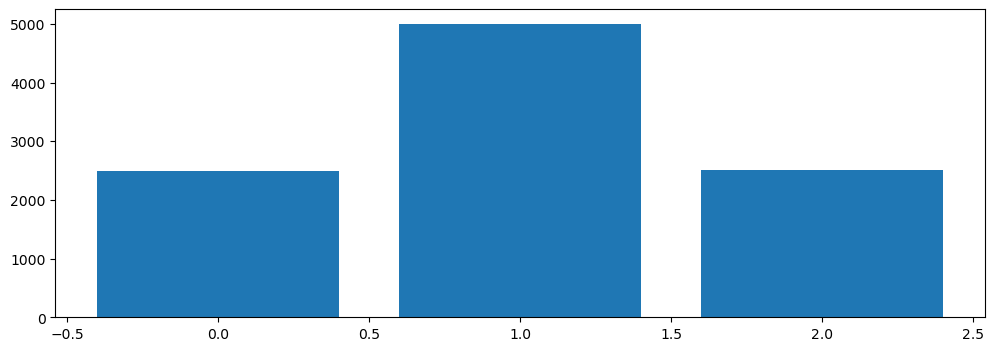

In [33]:
# Flipping two coins 10000 times to show the resulting probability of getting HH
# import matplotlib.pyplot as plt

rand_coins = np.random.binomial(2, .5, 10000)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
x, counts = np.unique(rand_coins, return_counts=True)
ax.bar(x, counts);

In [34]:
# Display the counts value

counts

array([2495, 4999, 2506])

As expected, the probability of HH comes in at approx .25 which we can verify with... 

In [35]:
# probability would be .5 for each coin so combined would be
p = .50 * .50

p

0.25

In [36]:
# Define the Entropy Formula as a function

def H(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

In [37]:
# Calculate the Entropy value for the probability achieved above (i.e 25%)

H(0.25)

0.8112781244591328

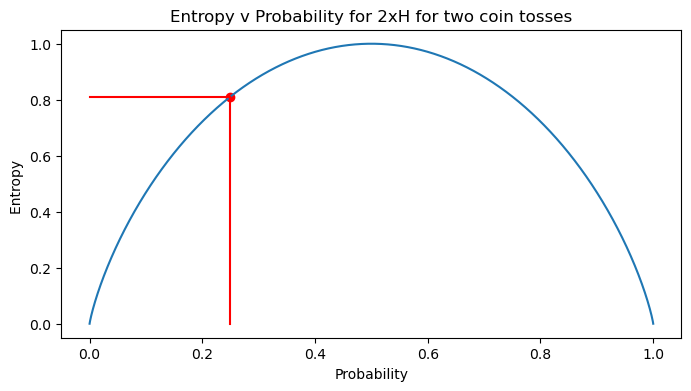

In [38]:
# Plotting Entropy

fig, ax = plt.subplots(figsize= (8,4))

# Plot full range of probabilities from 0 to 1 and the associated Enttopy value
p = np.linspace(0.000001, 0.999999, 10001)
ax.plot(p, H(p));

# Add lines to indicate where our Probability (25%) and Entropy (0.81) meet
p=0.25 #Probability
e=0.81 #Entropy

plt.plot((p, p), (0.0, e),color='r');
plt.plot((0.0, p), (e, e),color='r');
plt.scatter(0.25, 0.81,color='r');
plt.title("Entropy v Probability for 2xH for two coin tosses")
plt.xlabel("Probability");
plt.ylabel("Entropy ");

# Task5

>The purpose of this task is to create approprite individual plots for each of the variables in the penguin data set.

The following are the variables in the dataset:

| Variable Name |
| --- |
| species |
| island |
| bill_length_mm |
| bill_depth_mm |
| flipper_length_mm |
| body_mass_g |
| sex |

Describe the data and give reason for the chosen plot type...
discrete v continuous, 
Notes 
Species - Pie/Bar Chart   
Island - Pie/Bar Chart   
Sex - Pie Chart   
flipper/bill size and mass - historgrams   

Scatter Plots for comparing x vs y etc



Sources:
https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn



### species
Species is a categorical variable and as we saw earlier, contains just three possible values - Adelie, Chinstrap and Gentoo. The most appropriate plot to use would be a bar chart showing the frequency/count of each species.

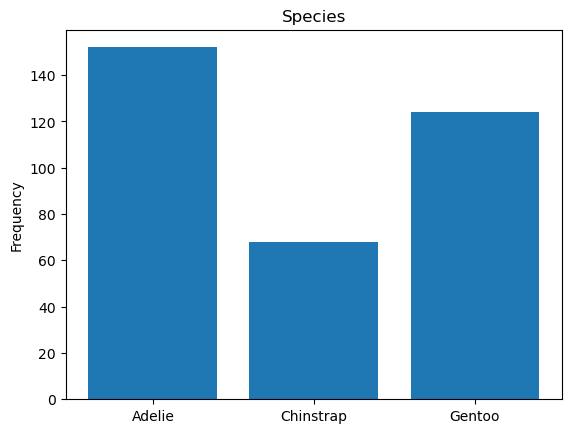

In [39]:
# Create a list just for Species, sum the values per species and generate a bar chart
species_l = []
for x in df['species']:
    species_l.append(x)

plt.title("Species")
plt.ylabel("Frequency")
penguin_types=np.unique(species_l)
counts = []
for x in penguin_types:
    counts.append(species_l.count(x))

plt.bar(penguin_types, counts);

From the graph above we can see the frequency of each penguin species. Adelie appears the most frequently with 146, followed by Gentoo with 119 and Chinstrap with 68. The graph is ordered alphabetically but could also be ordered numerically to show the frequency count from high to low. A bar chart like this is ideal to get a quick overview of a categorical variable such as species.

### island
Species is also a categorical variable and as we saw earlier, also contains just three possible values - Biscoe, Dream and Torgersen. The most appropriate plot to use would also be a bar chart showing the frequency/count of each island.

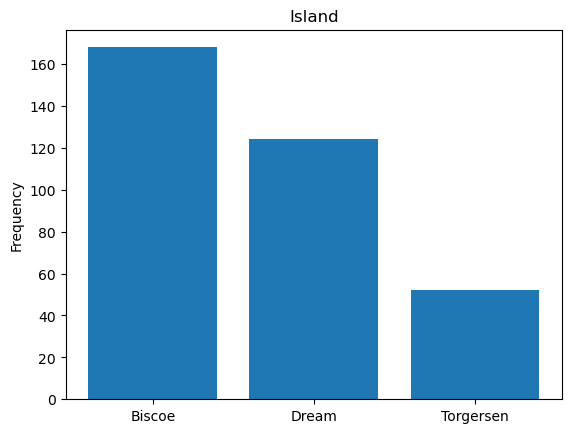

In [40]:
# Create a list just for island, sum the values by island and generate a bar chart

island_l = []
for x in df['island']:
    island_l.append(x)

plt.title("Island")
plt.ylabel("Frequency")
island_name=np.unique(island_l)
counts = []
for x in island_name:
    counts.append(island_l.count(x))

plt.bar(island_name, counts);

From the graph above we can see the frequency/counts of penguins on each of the three islands. The majority of penguins sampled were from Biscoe, with Dream coming next and followed by Torgersen. Similar to the species variable, a bar chart like this is ideal to get a quick overview of the island variable.

### sex
Sex is another categorical variable and contains just two possible values - Male and Female. The most appropriate plot to use could be a bar chart showing the frequency/count of each sex or we could also use a pie chart showing the breakdown to include the percentages of male/female.

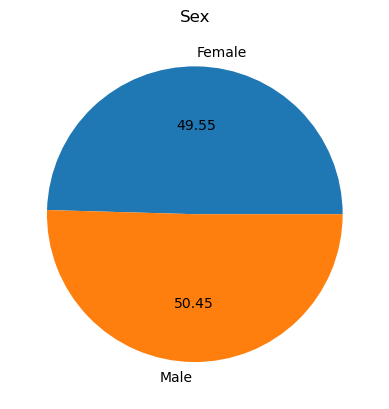

In [41]:
# Create a list just for sex, sum the values and generate a bar chart

sex_l = []

for x in df['sex']:
    if str(x) != "nan":
        sex_l.append(x)
gender=np.unique(sex_l)
counts = []
for x in gender:
    counts.append(sex_l.count(x))

plt.title("Sex")
plt.pie(counts, labels = gender, autopct='%.2f');

From the chart above we can see the frequency and distribution of penguins be sex. Males slighly outnumber females by 50.45 to 49.55%. A bar chart could have been used to show the same information for the sex variable.

### flipper_length
Flipper_length is a quantative variable with numeric values which are ordinal. The most interesting features for a set of data like this could be basic statistics such as min, max, mean and also the overall summary of data. The most appropriate plot to show these values would be a histogram. Given the variance by species it would make sense to plot the three species seperately rather than as a single data set.

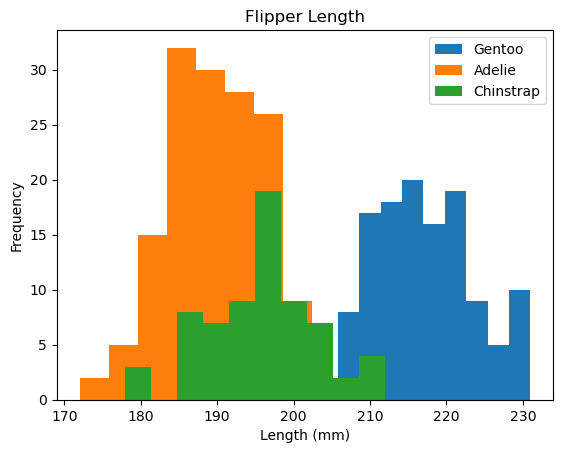

In [42]:
# Create seperate lists just for flipper_length and plot a histogram

flipper_length_gentoo_l=df.loc[df["species"]=="Gentoo"]
flipper_length_chinstrap_l=df.loc[df["species"]=="Chinstrap"]
flipper_length_adelie_l=df.loc[df["species"]=="Adelie"]

# Add title and labels
plt.title("Flipper Length")
plt.xlabel("Length (mm)")
plt.ylabel("Frequency")

# Create the plots
plt.hist(flipper_length_gentoo_l["flipper_length_mm"],label='Gentoo')
plt.hist(flipper_length_adelie_l["flipper_length_mm"],label='Adelie')
plt.hist(flipper_length_chinstrap_l["flipper_length_mm"],label='Chinstrap')
plt.legend();

From the histogram above we can see the frequency and distribution of flipper length for each of the three penguin species. It shows how the Gentoo penguins have far larger flipper lengths than the other two species. The height of the frequency bars also gives an indication that there are more Adelie penguins in our data set. We can also roughly estimate other statistics such as mean, median and also the distribution of values.

### body_mass
Body_mass is also a quantative variable with numeric values which are ordinal. Again, the most interesting features for a set of data like this could be basic statistics such as min, max, mean and also the overall summary of data. The most appropriate plot to show these values would be a histogram. And, given the variance by species it would make sense to plot the three species seperately rather than as a single data set.

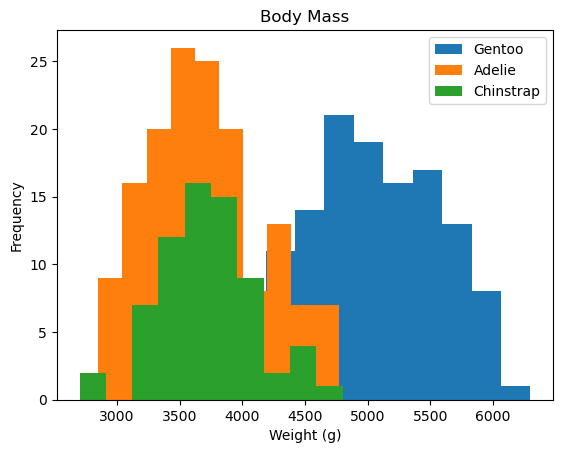

In [43]:
# Create a list just for body_mass and create a histogram

body_mass_gentoo_l=df.loc[df["species"]=="Gentoo"]
body_mass_chinstrap_l=df.loc[df["species"]=="Chinstrap"]
body_mass_adelie_l=df.loc[df["species"]=="Adelie"]

# Add title and labels
plt.title("Body Mass")
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")

# Create the plots
plt.hist(body_mass_gentoo_l["body_mass_g"],label='Gentoo')
plt.hist(body_mass_adelie_l["body_mass_g"],label='Adelie')
plt.hist(body_mass_chinstrap_l["body_mass_g"],label='Chinstrap')
plt.legend();

From the body mass histogram above we can see the frequency and distribution of the weights for each of the three penguin species. Gentoo penguins are showing as being the heavier, while Adelie and Chinstrap weights are roughly equal. We can see again from the spread and hight of the frequency bars that there are more Adelie penguins in our data set. And again it is possible to pick out values such as the min and max weights of each species and the data set as a whole, along with estimating the mean and median values.

### bill_length
Bill_length is a quantative variable with numeric values which are ordinal. The most interesting features for a set of data like this could be basic statistics such as min, max, mean and also the overall summary of data. The most appropriate plot to show these values would be a histogram. Given the variance by species it would make sense to plot the three species seperately rather than as a single data set.

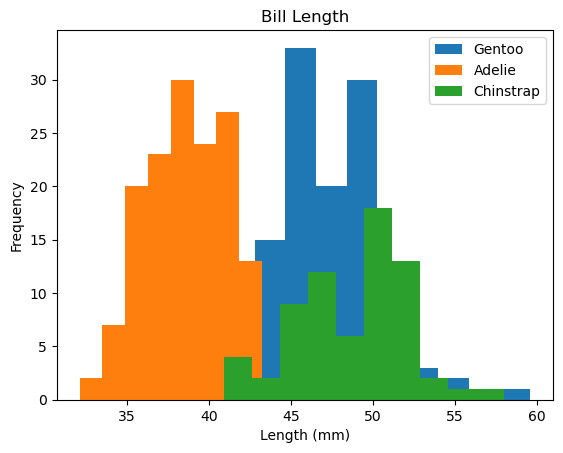

In [44]:
# Create a list just for bill_length and create a histogram

bil_length_gentoo_l=df.loc[df["species"]=="Gentoo"]
bill_length_chinstrap_l=df.loc[df["species"]=="Chinstrap"]
bill_length_adelie_l=df.loc[df["species"]=="Adelie"]

# Add title and labels
plt.title("Bill Length")
plt.xlabel("Length (mm)")
plt.ylabel("Frequency")

# create the plots
plt.hist(bil_length_gentoo_l["bill_length_mm"],label='Gentoo')
plt.hist(bill_length_adelie_l["bill_length_mm"],label='Adelie')
plt.hist(bill_length_chinstrap_l["bill_length_mm"],label='Chinstrap')
plt.legend();


From the body length histogram above we can see the frequency and distribution of the bill lengths for each of the three penguin species. Adelie penguins tend to have shorter bill lengths while there is quite a lot of overlap in the lengths for Gentoo and CHinstrap penguins. Again we can pick out basic statistics such as min and max values by species or from the data set as a whole along with estimating the mean, median etc.

### bill_depth
Bill_depth is likewise a quantative variable with numeric values which are ordinal. Again, the most interesting features for a set of data like this could be basic statistics such as min, max, mean and also the overall summary of data. The most appropriate plot to show these values would be a histogram and as above with bill_length, iven the variance by species it would make sense to plot the three species seperately rather than as a single data set.

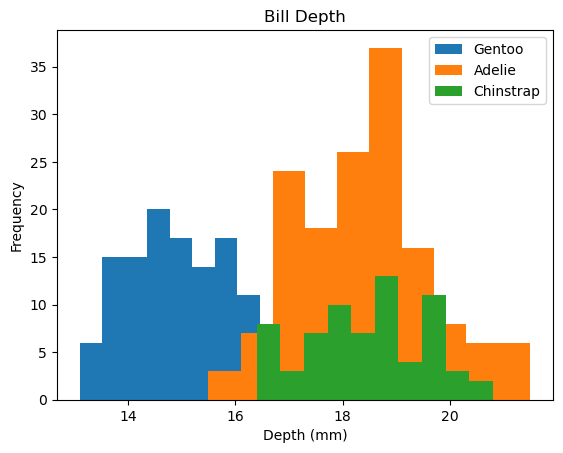

In [45]:
# Create a list just for bill_depth and create a histogram

bill_depth_gentoo_l=df.loc[df["species"]=="Gentoo"]
bill_depth_chinstrap_l=df.loc[df["species"]=="Chinstrap"]
bill_depth_adelie_l=df.loc[df["species"]=="Adelie"]

# Add title and labels
plt.title("Bill Depth")
plt.xlabel("Depth (mm)")
plt.ylabel("Frequency")

# Create the plots
plt.hist(bill_depth_gentoo_l["bill_depth_mm"],label='Gentoo')
plt.hist(bill_depth_adelie_l["bill_depth_mm"],label='Adelie')
plt.hist(bill_depth_chinstrap_l["bill_depth_mm"],label='Chinstrap')
plt.legend();

From the bill depth histogram above we can see the frequency and distribution of the bill depths for each of the three penguin species. As described in the previous sections we can now pull oput various statistics from the graphs such as min, max, mean and median values by penguin species and overall, along with the distribution of the values.

### bill_length and bill_depth

Given that bill_length and bill_depth are related, rather than showing them as individual plots as above, we could visualise the data using a scatterplot to give a true reflection of the relationship between the variables.   

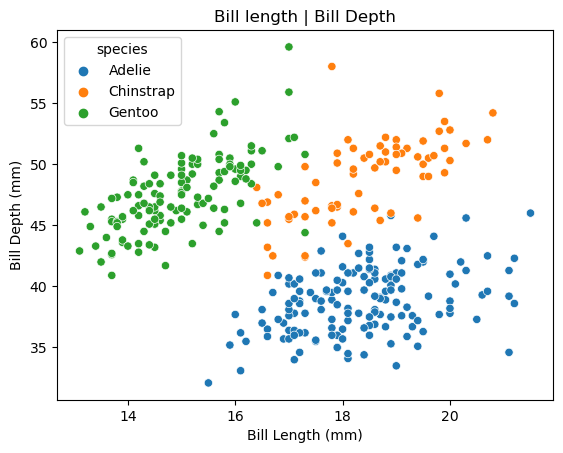

In [46]:
# Create a scatter plot to compare bill_length and bill_depth using seaborn

# Define the data for x and y axis
bill_length = df['bill_length_mm']
bill_depth =  df['bill_depth_mm']

# Add a title and labels
plt.title("Bill length | Bill Depth")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

sns.scatterplot(x=bill_depth, y=bill_length, hue=df.species);

The above plot uses seaborn and allows us to visualise the relationship between bill length and bill depth by penguin type. We can see the data is generally clustered by species with not much overlap and can pick out the relationship between the two variables by species.

# References

$^1$ mwaskom/seaborn-data: Data repository for seaborn examples. Aug. 30, 2023. url: https://github.com/mwaskom/ seaborn - data / blob / master / penguins.csv (visited on 10/25/2023)


# Appendix

## Additional plots that could be used for task5

#### Correlation Matrix

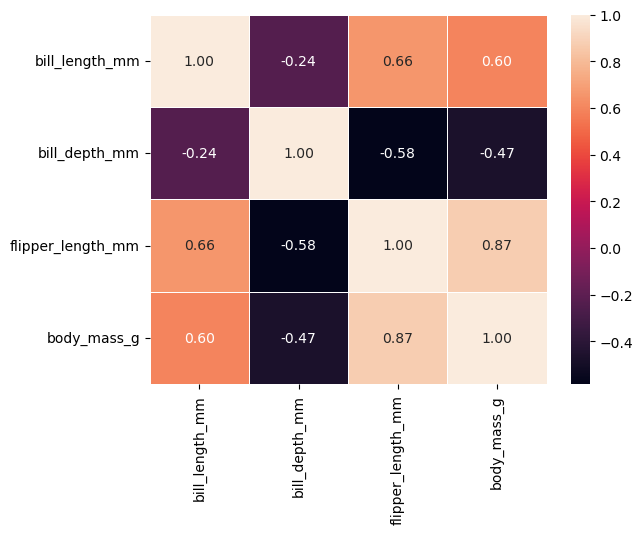

In [47]:
# Correlation Matrix
#Inspiration on using the inbuilt corr() to generate Pearson's correlation table taken from https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
corr = df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

#### Pair Plot

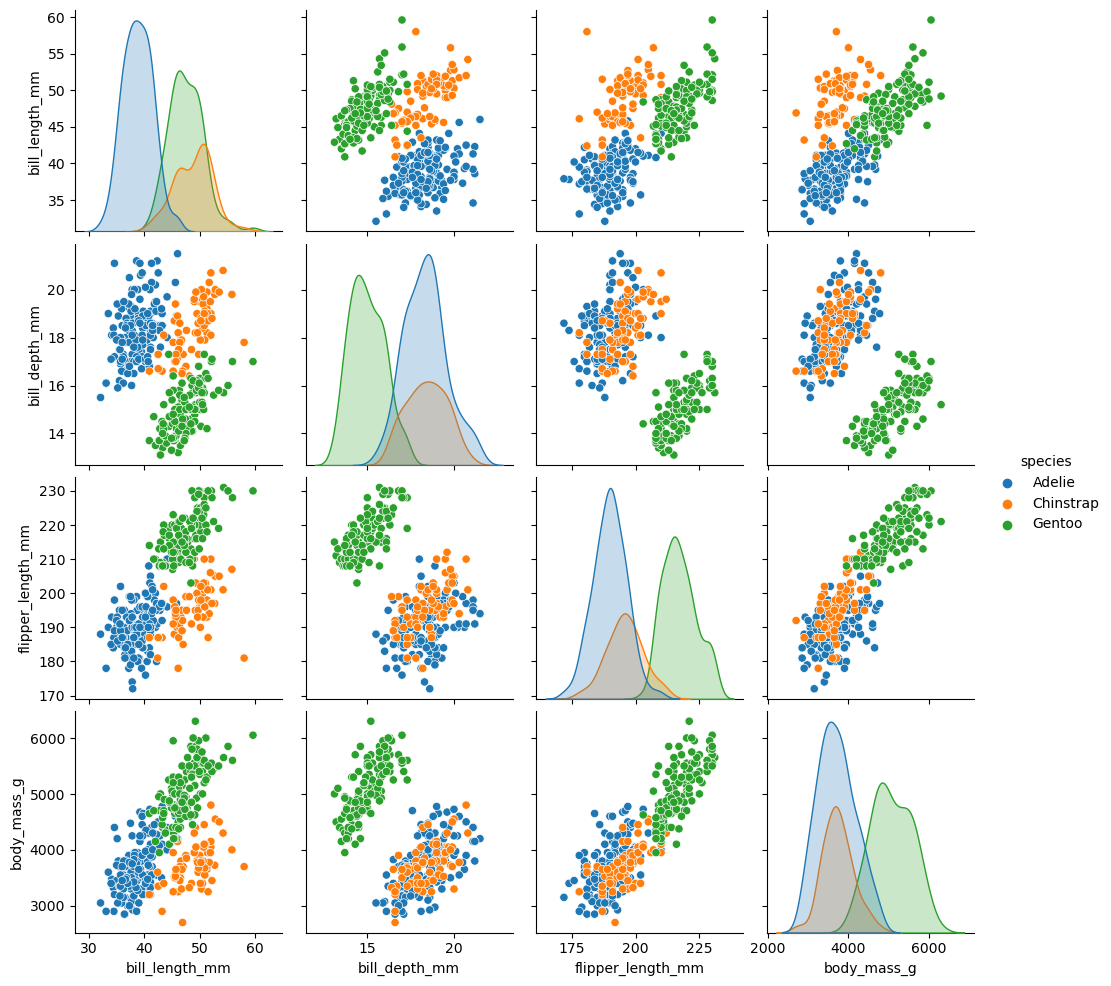

In [48]:
# Pair Plot
# import seaborn as sns
sns.pairplot(df, hue='species');

***

## End